# 02 - Modelo Inicial
Repositorio: [github.com/MateoRomano02/tp_equidad](https://github.com/MateoRomano02/tp_equidad)


Este notebook corresponde al punto N°2 del TP

## Objetivo
Entrenar un modelo de clasificación sobre el dataset *German Credit Data* y evaluar su rendimiento con métricas como accuracy, precision, recall y F1-score. Además, se analizará cuál error es más costoso para el banco.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


## Carga de datos

In [9]:

df = pd.read_csv("../data/processed/german_credit_clean.csv")

df.head()


,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account_bonds,employment_since,installment_rate_pct,personal_status_sex,other_debtors_guarantors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,Bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,Bad


In [ ]:
# dropeo nulos
df = df.dropna()

# codificacion
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separar features y target
X = df.drop("target", axis=1)
y = df["target"]  # 0=Bad, 1=Good

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


## TRAIN

In [12]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


## MATRIZ DE CONFUSION

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.40      0.49        91
           1       0.78      0.91      0.84       209

    accuracy                           0.75       300
   macro avg       0.72      0.65      0.67       300
weighted avg       0.74      0.75      0.73       300

Matriz de confusión:


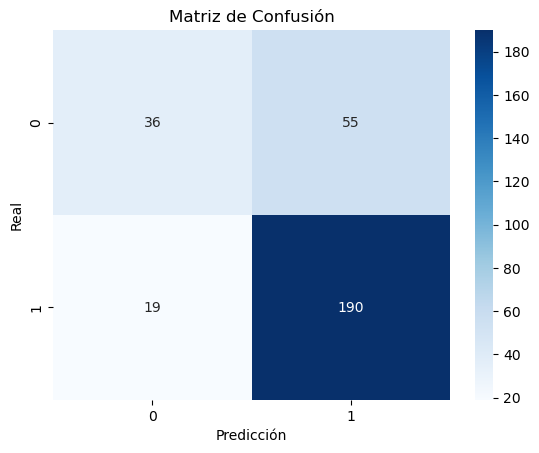

In [13]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## Análisis de errores y trade-off

En el contexto bancario, donde el objetivo es **maximizar los préstamos otorgados a personas que efectivamente los van a pagar**, el **falso positivo** (darle un préstamo a alguien que no lo va a pagar) puede representar una **pérdida financiera** significativa.

En cambio, un **falso negativo** (negarle un préstamo a alguien que sí lo iba a pagar) implica una oportunidad perdida, pero no un costo directo. Por eso, **los falsos positivos son el error más costoso** en este escenario.

Esto debería reflejarse en el umbral de decisión y posiblemente en la elección de métricas (por ejemplo, priorizar precisión sobre recall).
